In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List
from IPython.display import display

In [2]:
import sys
sys.path.append('../src')

In [3]:
# Import EDA utility functions

from data_processing import (
    load_data, data_overview, summary_statistics,
    plot_numerical_distributions, plot_categorical_distributions,
    correlation_analysis, missing_values, outlier_detection, count_outliers
)


In [4]:
# 1. Load Dataset
filepath = '../data/raw/data.csv'
df = load_data(filepath)

In [5]:
# 2. Overview of the Data
data_overview(df)

Shape: (95662, 16)
Data types:
TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object


In [6]:
# 3. Summary Statistics
summary_statistics(df)

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [7]:
# 4. Identify numerical and categorical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

In [8]:
# Optional: Remove IDs and timestamps from numerical columns if needed
excluded_cols = ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId']
num_cols = [col for col in num_cols if col not in excluded_cols]

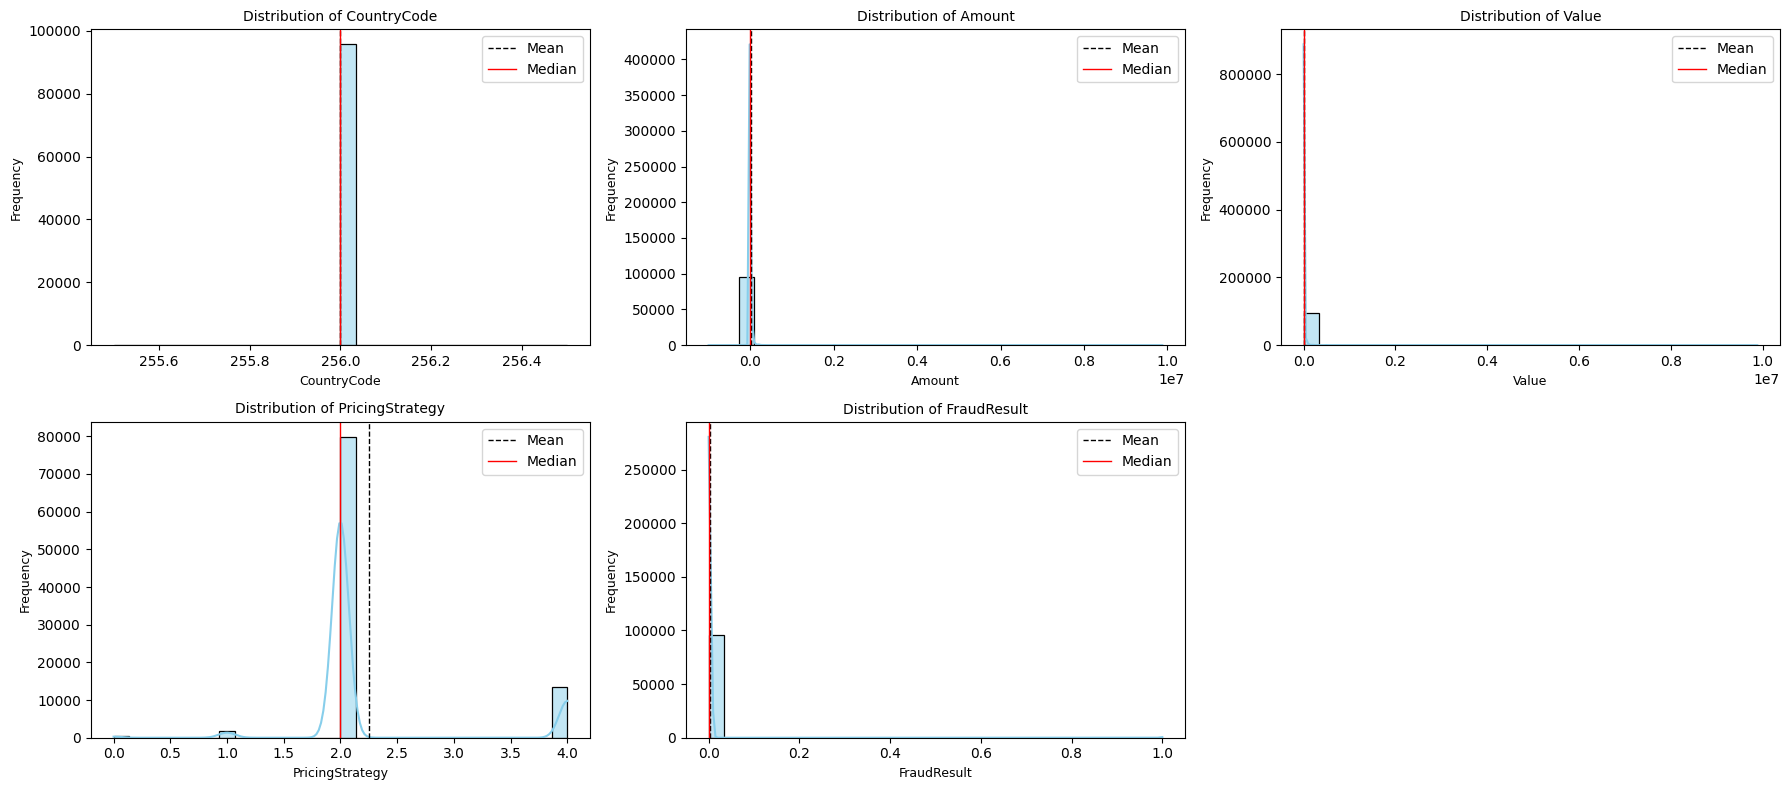

In [9]:
# 5. Distribution of Numerical Features
plot_numerical_distributions(df)

In [10]:
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values")


TransactionId: 95662 unique values
BatchId: 94809 unique values
AccountId: 3633 unique values
SubscriptionId: 3627 unique values
CustomerId: 3742 unique values
CurrencyCode: 1 unique values
ProviderId: 6 unique values
ProductId: 23 unique values
ProductCategory: 9 unique values
ChannelId: 4 unique values
TransactionStartTime: 94556 unique values


⏩ Skipping 'TransactionId' – 95662 unique values (too high)
⏩ Skipping 'BatchId' – 94809 unique values (too high)
⏩ Skipping 'AccountId' – 3633 unique values (too high)
⏩ Skipping 'SubscriptionId' – 3627 unique values (too high)
⏩ Skipping 'CustomerId' – 3742 unique values (too high)


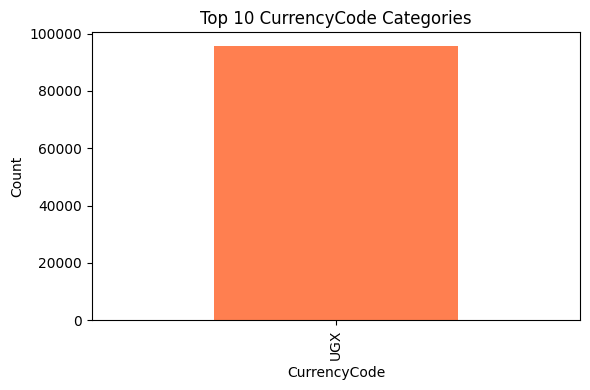

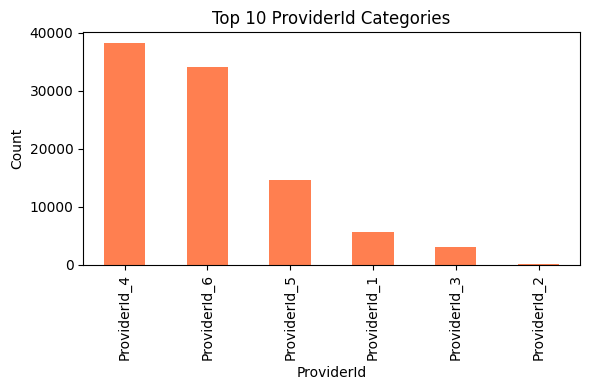

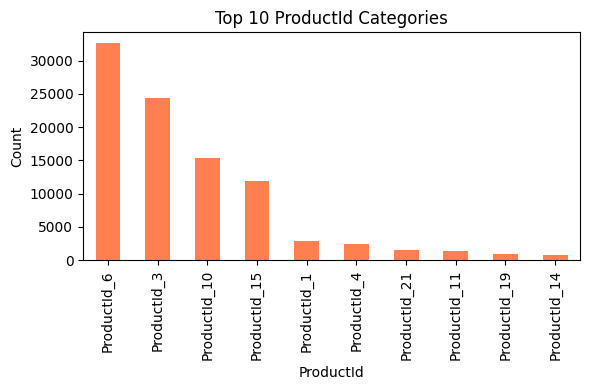

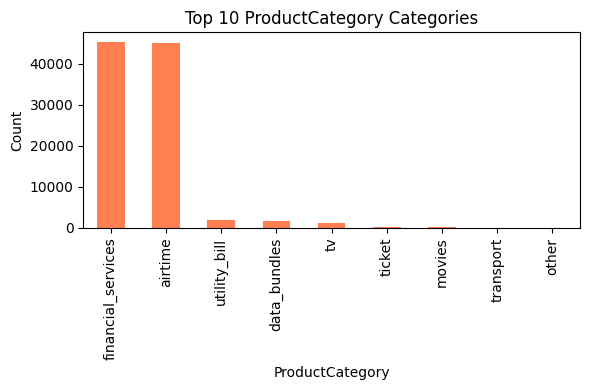

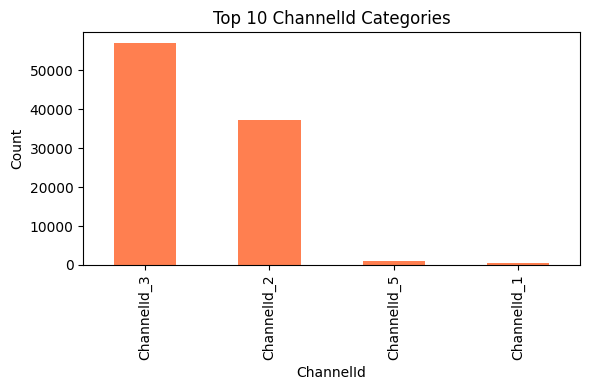

⏩ Skipping 'TransactionStartTime' – 94556 unique values (too high)


In [11]:
# 6. Distribution of Categorical Features
plot_categorical_distributions(df, cat_cols)

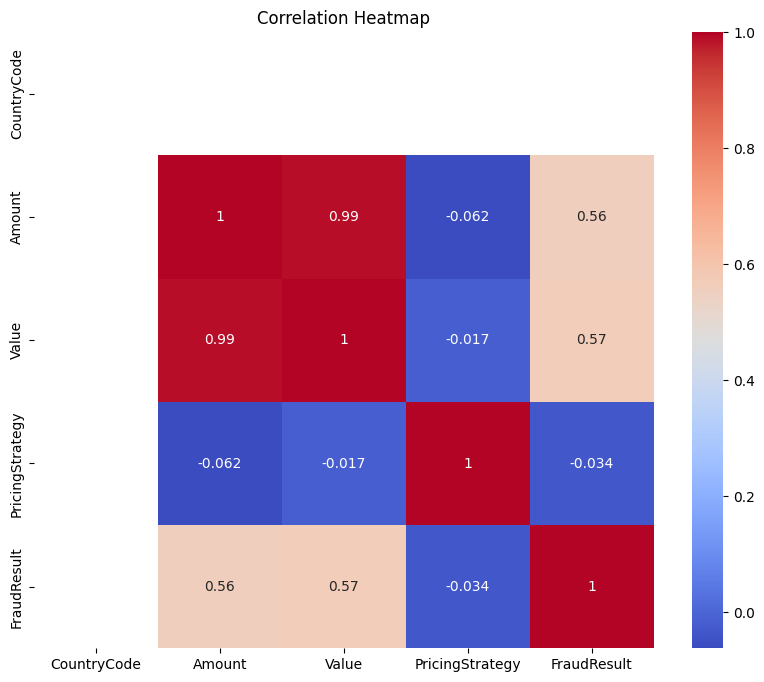

In [12]:
# 7. Correlation Analysis
correlation_analysis(df, num_cols)

In [13]:
# 8. Missing Values
missing_values(df)

Missing values per column:
Series([], dtype: int64)


c:\Users\User\Desktop\Week_5\Bank_Credit_Scoring\notebooks\../src\data_processing.py:148: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(outliers, x='Columns', y='Num. of Outliers', palette='husl')


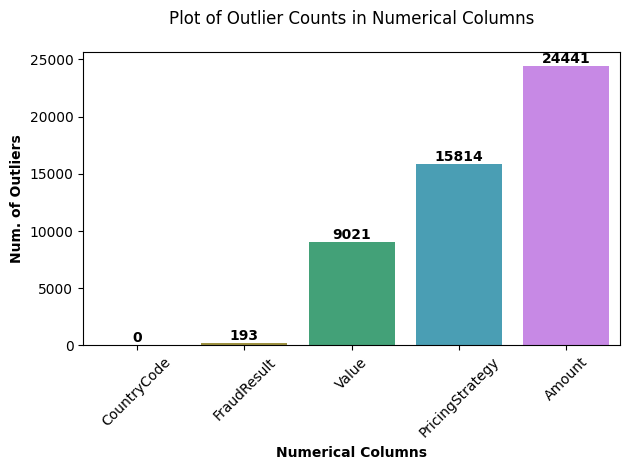

In [14]:
count_outliers(df)  # instead of outlier_detection(df, num_cols)

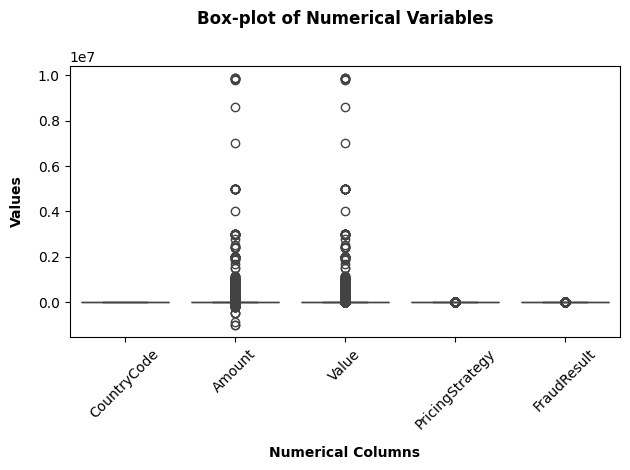

In [15]:
# 9. Outlier Detection
outlier_detection(df)

In [16]:
from IPython.display import Markdown

Markdown("""
### Key Insights:
1. (Insight about top correlated features or suspicious fraud indicators)
2. (Insight about missing values in key variables)
3. (Insight about skewed monetary features like `Amount` or `Value`)
4. (Insight about the dominant product or provider patterns)
5. (Any suspicious outliers or channel-based behavior differences)
""")



### Key Insights:
1. (Insight about top correlated features or suspicious fraud indicators)
2. (Insight about missing values in key variables)
3. (Insight about skewed monetary features like `Amount` or `Value`)
4. (Insight about the dominant product or provider patterns)
5. (Any suspicious outliers or channel-based behavior differences)
